In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '595fff01-7095-43a2-91f7-3b6d7878f922',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-06-06T17:45:17.610Z', 'error_code': 0, 'error_message': None, 'elapsed': 49, 'credit_count': 25, 'notice': None, 'total_count': 10407}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10243, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'pa

In [2]:
type(data)


dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

id                    name symbol                    slug  \
0         1                 Bitcoin    BTC                 bitcoin   
1      1027                Ethereum    ETH                ethereum   
2       825                  Tether   USDT                  tether   
3      1839                     BNB    BNB                     bnb   
4      3408                USD Coin   USDC                usd-coin   
...     ...                     ...    ...                     ...   
4995   9179            Defi For You    DFY            defi-for-you   
4996  26454                    YURI   YURI                    yuri   
4997  19376           Bitpaid Token    BTP           bitpaid-token   
4998   9438                 Nominex    NMX           nominex-token   
4999   6118  BitoPro Exchange Token   BITO  bitopro-exchange-token   

      num_market_pairs                date_added  \
0                10243  2010-07-13T00:00:00.000Z   
1                 6970  2015-08-07T00:00:00.000Z   
2                55075  2015-02-25T00:00:00.000Z   
3                 1446  2017-07-25T00:00:00.000Z   
4                12847  2018-10-08T00:00:00.000Z   
...                ...                       ...   
4995                21  2021-04-08T00:00:00.000Z   
4996                 1  2023-05-31T06:26:07.000Z   
4997                 3  2022-04-06T12:11:26.000Z   
4998                26  2021-04-23T00:00:00.000Z   
4999                 4  2020-08-04T00:00:00.000Z   

                                                   tags    max_supply  \
0     [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1     [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2     [payments, stablecoin, asset-backed-stablecoin...           NaN   
3     [marketplace, centralized-exchange, payments, ...           NaN   
4     [medium-of-exchange, stablecoin, asset-backed-...           NaN   
...                                                 ...           ...   
4995                                        [bnb-chain]  8.776165e+08   
4996                                [arbitrum-ecosytem]  5.000000e+14   
4997                                                 []           NaN   
4998                                   [amm, bnb-chain]  2.000000e+08   
4999                             [centralized-exchange]  5.000000e+08   

      circulating_supply        total_supply  infinite_supply  platform  \
0           1.939434e+07            19394343            False       NaN   
1           1.202339e+08    120233888.889201             True       NaN   
2           8.321899e+10  86090638894.730759             True       NaN   
3           1.558555e+08    155855503.120077            False       NaN   
4           2.878636e+10  28786361627.179203            False       NaN   
...                  ...                 ...              ...       ...   
4995        0.000000e+00         861416467.7            False       NaN   
4996        0.000000e+00     500000000000000            False       NaN   
4997        0.000000e+00              425000            False       NaN   
4998        0.000000e+00            85425576            False       NaN   
4999        0.000000e+00                   0            False       NaN   

      cmc_rank  self_reported_circulating_supply  self_reported_market_cap  \
0            1                               NaN                       NaN   
1            2                               NaN                       NaN   
2            3                               NaN                       NaN   
3            4                               NaN                       NaN   
4            5                               NaN                       NaN   
...        ...                               ...                       ...   
4995      4997                      4.064165e+08              1.801034e+05   
4996      4998                      5.000000e+12              4.956125e+04   
4997      4999                               NaN               

In [4]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '595fff01-7095-43a2-91f7-3b6d7878f922',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    #df2 = pd.json_normalize(data['data'])
    #df2['Timestamp'] = pd.to_datetime('now')
    #df = df.append(df2)
    
     #df_append = pd.DataFrame(df2)
    #df = pd.concat([df2,df_append])
    
    
    # Use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    

    if not os.path.isfile(r'C:\Users\sunidhi suri\Desktop\API.csv'):
        
        df.to_csv(r'C:\Users\sunidhi suri\Desktop\API.csv', header='column_names')
        
        
    else:
        df.to_csv(r'C:\Users\sunidhi suri\Desktop\API.csv', mode='a', header=False)
        
    #Then to read in the file:
    df = pd.read_csv(r'C:\Users\sunidhi suri\Desktop\API.csv')

# If that didn't work try using the local host URL as shown in the video

In [5]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
    

exit()


c:\users\sunidhi suri\miniconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


c:\users\sunidhi suri\miniconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


c:\users\sunidhi suri\miniconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


c:\users\sunidhi suri\miniconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


c:\users\sunidhi suri\miniconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


KeyboardInterrupt: 

In [8]:
df

Unnamed: 0    id         name symbol          slug  num_market_pairs  \
0             0     1      Bitcoin    BTC       bitcoin             10243   
1             1  1027     Ethereum    ETH      ethereum              6974   
2             2   825       Tether   USDT        tether             55100   
3             3  1839          BNB    BNB           bnb              1446   
4             4  3408     USD Coin   USDC      usd-coin             12853   
5             5    52          XRP    XRP           xrp               960   
6             6  2010      Cardano    ADA       cardano               825   
7             7    74     Dogecoin   DOGE      dogecoin               718   
8             8  5426       Solana    SOL        solana               468   
9             9  3890      Polygon  MATIC       polygon               729   
10           10  1958         TRON    TRX          tron               768   
11           11     2     Litecoin    LTC      litecoin               918   
12           12  6636     Polkadot    DOT  polkadot-new               507   
13           13  4687  Binance USD   BUSD   binance-usd              6879   
14           14  5805    Avalanche   AVAX     avalanche               444   
15            0     1      Bitcoin    BTC       bitcoin             10243   
16            1  1027     Ethereum    ETH      ethereum              6974   
17            2   825       Tether   USDT        tether             55100   
18            3  1839          BNB    BNB           bnb              1446   
19            4  3408     USD Coin   USDC      usd-coin             12853   
20            5    52          XRP    XRP           xrp               960   
21            6  2010      Cardano    ADA       cardano               825   
22            7    74     Dogecoin   DOGE      dogecoin               718   
23            8  5426       Solana    SOL        solana               468   
24            9  3890      Polygon  MATIC       polygon               729   
25           10  1958         TRON    TRX          tron               768   
26           11     2     Litecoin    LTC      litecoin               918   
27           12  6636     Polkadot    DOT  polkadot-new               507   
28           13  4687  Binance USD   BUSD   binance-usd              6879   
29           14  5805    Avalanche   AVAX     avalanche               444   
30            0     1      Bitcoin    BTC       bitcoin             10243   
31            1  1027     Ethereum    ETH      ethereum              6974   
32            2   825       Tether   USDT        tether             55103   
33            3  1839          BNB    BNB           bnb              1446   
34            4  3408     USD Coin   USDC      usd-coin             12854   
35            5    52          XRP    XRP           xrp               960   
36            6  2010      Cardano    ADA       cardano               825   
37            7    74     Dogecoin   DOGE      dogecoin               718   
38            8  5426       Solana    SOL        solana               468   
39            9  3890      Polygon  MATIC       polygon               729   
40           10  1958         TRON    TRX          tron               768   
41           11     2     Litecoin    LTC      litecoin               918   
42           12  6636     Polkadot    DOT  polkadot-new               507   
43           13  4687  Binance USD   BUSD   binance-usd              6879   
44           14  5805    Avalanche   AVAX     avalanche               444   
45            0     1      Bitcoin    BTC       bitcoin             10243   
46            1  1027     Ethereum    ETH      ethereum              6974   
47            2   825       Tether   USDT        tether             55103   
48            3  1839          BNB    BNB           bnb              1446   
49            4  3408     USD Coin   USDC      usd-coin             12854   
50            5    52          XRP    XRP           xrp               960   
5

In [9]:
df3 = pd.read_csv(r'C:\Users\sunidhi suri\Desktop\API.csv')
df3

Unnamed: 0    id         name symbol          slug  num_market_pairs  \
0             0     1      Bitcoin    BTC       bitcoin             10243   
1             1  1027     Ethereum    ETH      ethereum              6974   
2             2   825       Tether   USDT        tether             55100   
3             3  1839          BNB    BNB           bnb              1446   
4             4  3408     USD Coin   USDC      usd-coin             12853   
5             5    52          XRP    XRP           xrp               960   
6             6  2010      Cardano    ADA       cardano               825   
7             7    74     Dogecoin   DOGE      dogecoin               718   
8             8  5426       Solana    SOL        solana               468   
9             9  3890      Polygon  MATIC       polygon               729   
10           10  1958         TRON    TRX          tron               768   
11           11     2     Litecoin    LTC      litecoin               918   
12           12  6636     Polkadot    DOT  polkadot-new               507   
13           13  4687  Binance USD   BUSD   binance-usd              6879   
14           14  5805    Avalanche   AVAX     avalanche               444   
15            0     1      Bitcoin    BTC       bitcoin             10243   
16            1  1027     Ethereum    ETH      ethereum              6974   
17            2   825       Tether   USDT        tether             55100   
18            3  1839          BNB    BNB           bnb              1446   
19            4  3408     USD Coin   USDC      usd-coin             12853   
20            5    52          XRP    XRP           xrp               960   
21            6  2010      Cardano    ADA       cardano               825   
22            7    74     Dogecoin   DOGE      dogecoin               718   
23            8  5426       Solana    SOL        solana               468   
24            9  3890      Polygon  MATIC       polygon               729   
25           10  1958         TRON    TRX          tron               768   
26           11     2     Litecoin    LTC      litecoin               918   
27           12  6636     Polkadot    DOT  polkadot-new               507   
28           13  4687  Binance USD   BUSD   binance-usd              6879   
29           14  5805    Avalanche   AVAX     avalanche               444   
30            0     1      Bitcoin    BTC       bitcoin             10243   
31            1  1027     Ethereum    ETH      ethereum              6974   
32            2   825       Tether   USDT        tether             55103   
33            3  1839          BNB    BNB           bnb              1446   
34            4  3408     USD Coin   USDC      usd-coin             12854   
35            5    52          XRP    XRP           xrp               960   
36            6  2010      Cardano    ADA       cardano               825   
37            7    74     Dogecoin   DOGE      dogecoin               718   
38            8  5426       Solana    SOL        solana               468   
39            9  3890      Polygon  MATIC       polygon               729   
40           10  1958         TRON    TRX          tron               768   
41           11     2     Litecoin    LTC      litecoin               918   
42           12  6636     Polkadot    DOT  polkadot-new               507   
43           13  4687  Binance USD   BUSD   binance-usd              6879   
44           14  5805    Avalanche   AVAX     avalanche               444   
45            0     1      Bitcoin    BTC       bitcoin             10243   
46            1  1027     Ethereum    ETH      ethereum              6974   
47            2   825       Tether   USDT        tether             55103   
48            3  1839          BNB    BNB           bnb              1446   
49            4  3408     USD Coin   USDC      usd-coin             12854   
50            5    52          XRP    XRP           xrp               960   
5

In [10]:
df



Unnamed: 0    id         name symbol          slug  num_market_pairs  \
0             0     1      Bitcoin    BTC       bitcoin             10243   
1             1  1027     Ethereum    ETH      ethereum              6974   
2             2   825       Tether   USDT        tether             55100   
3             3  1839          BNB    BNB           bnb              1446   
4             4  3408     USD Coin   USDC      usd-coin             12853   
5             5    52          XRP    XRP           xrp               960   
6             6  2010      Cardano    ADA       cardano               825   
7             7    74     Dogecoin   DOGE      dogecoin               718   
8             8  5426       Solana    SOL        solana               468   
9             9  3890      Polygon  MATIC       polygon               729   
10           10  1958         TRON    TRX          tron               768   
11           11     2     Litecoin    LTC      litecoin               918   
12           12  6636     Polkadot    DOT  polkadot-new               507   
13           13  4687  Binance USD   BUSD   binance-usd              6879   
14           14  5805    Avalanche   AVAX     avalanche               444   
15            0     1      Bitcoin    BTC       bitcoin             10243   
16            1  1027     Ethereum    ETH      ethereum              6974   
17            2   825       Tether   USDT        tether             55100   
18            3  1839          BNB    BNB           bnb              1446   
19            4  3408     USD Coin   USDC      usd-coin             12853   
20            5    52          XRP    XRP           xrp               960   
21            6  2010      Cardano    ADA       cardano               825   
22            7    74     Dogecoin   DOGE      dogecoin               718   
23            8  5426       Solana    SOL        solana               468   
24            9  3890      Polygon  MATIC       polygon               729   
25           10  1958         TRON    TRX          tron               768   
26           11     2     Litecoin    LTC      litecoin               918   
27           12  6636     Polkadot    DOT  polkadot-new               507   
28           13  4687  Binance USD   BUSD   binance-usd              6879   
29           14  5805    Avalanche   AVAX     avalanche               444   
30            0     1      Bitcoin    BTC       bitcoin             10243   
31            1  1027     Ethereum    ETH      ethereum              6974   
32            2   825       Tether   USDT        tether             55103   
33            3  1839          BNB    BNB           bnb              1446   
34            4  3408     USD Coin   USDC      usd-coin             12854   
35            5    52          XRP    XRP           xrp               960   
36            6  2010      Cardano    ADA       cardano               825   
37            7    74     Dogecoin   DOGE      dogecoin               718   
38            8  5426       Solana    SOL        solana               468   
39            9  3890      Polygon  MATIC       polygon               729   
40           10  1958         TRON    TRX          tron               768   
41           11     2     Litecoin    LTC      litecoin               918   
42           12  6636     Polkadot    DOT  polkadot-new               507   
43           13  4687  Binance USD   BUSD   binance-usd              6879   
44           14  5805    Avalanche   AVAX     avalanche               444   
45            0     1      Bitcoin    BTC       bitcoin             10243   
46            1  1027     Ethereum    ETH      ethereum              6974   
47            2   825       Tether   USDT        tether             55103   
48            3  1839          BNB    BNB           bnb              1446   
49            4  3408     USD Coin   USDC      usd-coin             12854   
50            5    52          XRP    XRP           xrp               960   
5

In [12]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [13]:
df

Unnamed: 0    id         name symbol          slug  num_market_pairs  \
0             0     1      Bitcoin    BTC       bitcoin             10243   
1             1  1027     Ethereum    ETH      ethereum              6974   
2             2   825       Tether   USDT        tether             55100   
3             3  1839          BNB    BNB           bnb              1446   
4             4  3408     USD Coin   USDC      usd-coin             12853   
5             5    52          XRP    XRP           xrp               960   
6             6  2010      Cardano    ADA       cardano               825   
7             7    74     Dogecoin   DOGE      dogecoin               718   
8             8  5426       Solana    SOL        solana               468   
9             9  3890      Polygon  MATIC       polygon               729   
10           10  1958         TRON    TRX          tron               768   
11           11     2     Litecoin    LTC      litecoin               918   
12           12  6636     Polkadot    DOT  polkadot-new               507   
13           13  4687  Binance USD   BUSD   binance-usd              6879   
14           14  5805    Avalanche   AVAX     avalanche               444   
15            0     1      Bitcoin    BTC       bitcoin             10243   
16            1  1027     Ethereum    ETH      ethereum              6974   
17            2   825       Tether   USDT        tether             55100   
18            3  1839          BNB    BNB           bnb              1446   
19            4  3408     USD Coin   USDC      usd-coin             12853   
20            5    52          XRP    XRP           xrp               960   
21            6  2010      Cardano    ADA       cardano               825   
22            7    74     Dogecoin   DOGE      dogecoin               718   
23            8  5426       Solana    SOL        solana               468   
24            9  3890      Polygon  MATIC       polygon               729   
25           10  1958         TRON    TRX          tron               768   
26           11     2     Litecoin    LTC      litecoin               918   
27           12  6636     Polkadot    DOT  polkadot-new               507   
28           13  4687  Binance USD   BUSD   binance-usd              6879   
29           14  5805    Avalanche   AVAX     avalanche               444   
30            0     1      Bitcoin    BTC       bitcoin             10243   
31            1  1027     Ethereum    ETH      ethereum              6974   
32            2   825       Tether   USDT        tether             55103   
33            3  1839          BNB    BNB           bnb              1446   
34            4  3408     USD Coin   USDC      usd-coin             12854   
35            5    52          XRP    XRP           xrp               960   
36            6  2010      Cardano    ADA       cardano               825   
37            7    74     Dogecoin   DOGE      dogecoin               718   
38            8  5426       Solana    SOL        solana               468   
39            9  3890      Polygon  MATIC       polygon               729   
40           10  1958         TRON    TRX          tron               768   
41           11     2     Litecoin    LTC      litecoin               918   
42           12  6636     Polkadot    DOT  polkadot-new               507   
43           13  4687  Binance USD   BUSD   binance-usd              6879   
44           14  5805    Avalanche   AVAX     avalanche               444   
45            0     1      Bitcoin    BTC       bitcoin             10243   
46            1  1027     Ethereum    ETH      ethereum              6974   
47            2   825       Tether   USDT        tether             55103   
48            3  1839          BNB    BNB           bnb              1446   
49            4  3408     USD Coin   USDC      usd-coin             12854   
50            5    52          XRP    XRP           xrp               960   
5

In [14]:
# Now let's look at the coin trends over time

df4 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df4


quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
name                                                                     
Bitcoin                          1.79439                       3.40609   
Ethereum                         1.51708                       3.35460   
Tether                          -0.00258                      -0.00768   
BNB                              1.06666                       1.46201   
USD Coin                        -0.00610                       0.00883   
XRP                              0.92662                       3.21433   
Cardano                          1.08664                       0.77564   
Dogecoin                         0.80482                       3.89118   
Solana                           1.06064                       0.36290   
Polygon                          1.26269                      -3.59153   
TRON                             0.01674                      -0.30185   
Litecoin                         1.19310                       2.56705   
Polkadot                         0.75428                       2.02290   
Binance USD                      0.00745                       0.03060   
Avalanche                        1.27008                       3.14680   

             quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
name                                                                     
Bitcoin                         -3.90048                      -8.02770   
Ethereum                        -1.55848                      -2.15864   
Tether                          -0.01516                      -0.11851   
BNB                             -9.52933                     -12.81463   
USD Coin                         0.00323                      -0.00852   
XRP                             -1.38358                      12.46860   
Cardano                         -6.20319                      -6.85463   
Dogecoin                        -4.86793                     -10.77690   
Solana                          -4.46937                     -10.52670   
Polygon                         -8.71077                     -16.22864   
TRON                             2.07248                      11.44629   
Litecoin                        -2.60726                       6.71805   
Polkadot                        -5.64146                      -9.35532   
Binance USD                     -0.04548                      -0.11141   
Avalanche                       -0.58794                     -13.63310   

             quote.USD.percent_change_60d  quote.USD.percent_change_90d  
name                                                                     
Bitcoin                          -4.66983                      20.51408  
Ethereum                          0.83603                      20.35743  
Tether                           -0.04746                       0.00778  
BNB                              -9.18596                      -3.26989  
USD Coin                          0.00093                       0.00347  
XRP                               1.16848                      29.64936  
Cardano                          -7.69085                       9.59904  
Dogecoin                        -16.42471                      -5.83795  
Solana                           -1.59483                       6.42562  
Polygon                         -26.24642                     -24.63134  
TRON                             17.50984                      18.03078  
Litecoin                         -0.83042                       6.95299  
Polkadot                        -16.98797                      -9.77225  
Binance USD                      -0.00057                      -0.05494  
Avalanche                       -18.45535                      -8.70329

In [15]:
df5 = df4.stack()
df5


name                                     
Bitcoin      quote.USD.percent_change_1h      1.79439
             quote.USD.percent_change_24h     3.40609
             quote.USD.percent_change_7d     -3.90048
             quote.USD.percent_change_30d    -8.02770
             quote.USD.percent_change_60d    -4.66983
             quote.USD.percent_change_90d    20.51408
Ethereum     quote.USD.percent_change_1h      1.51708
             quote.USD.percent_change_24h     3.35460
             quote.USD.percent_change_7d     -1.55848
             quote.USD.percent_change_30d    -2.15864
             quote.USD.percent_change_60d     0.83603
             quote.USD.percent_change_90d    20.35743
Tether       quote.USD.percent_change_1h     -0.00258
             quote.USD.percent_change_24h    -0.00768
             quote.USD.percent_change_7d     -0.01516
             quote.USD.percent_change_30d    -0.11851
             quote.USD.percent_change_60d    -0.04746
             quote.USD.percent_change_90

In [16]:
type(df5)

pandas.core.series.Series

In [43]:
df5.count()

90

In [46]:
df6 = df5.to_frame(name='values')
df6

values
name                                              
Bitcoin     quote.USD.percent_change_1h    1.79439
            quote.USD.percent_change_24h   3.40609
            quote.USD.percent_change_7d   -3.90048
            quote.USD.percent_change_30d  -8.02770
            quote.USD.percent_change_60d  -4.66983
            quote.USD.percent_change_90d  20.51408
Ethereum    quote.USD.percent_change_1h    1.51708
            quote.USD.percent_change_24h   3.35460
            quote.USD.percent_change_7d   -1.55848
            quote.USD.percent_change_30d  -2.15864
            quote.USD.percent_change_60d   0.83603
            quote.USD.percent_change_90d  20.35743
Tether      quote.USD.percent_change_1h   -0.00258
            quote.USD.percent_change_24h  -0.00768
            quote.USD.percent_change_7d   -0.01516
            quote.USD.percent_change_30d  -0.11851
            quote.USD.percent_change_60d  -0.04746
            quote.USD.percent_change_90d   0.00778
BNB         quote.USD.percent_change_1h    1.06666
            quote.USD.percent_change_24h   1.46201
            quote.USD.percent_change_7d   -9.52933
            quote.USD.percent_change_30d -12.81463
            quote.USD.percent_change_60d  -9.18596
            quote.USD.percent_change_90d  -3.26989
USD Coin    quote.USD.percent_change_1h   -0.00610
            quote.USD.percent_change_24h   0.00883
            quote.USD.percent_change_7d    0.00323
            quote.USD.percent_change_30d  -0.00852
            quote.USD.percent_change_60d   0.00093
            quote.USD.percent_change_90d   0.00347
XRP         quote.USD.percent_change_1h    0.92662
            quote.USD.percent_change_24h   3.21433
            quote.USD.percent_change_7d   -1.38358
            quote.USD.percent_change_30d  12.46860
            quote.USD.percent_change_60d   1.16848
            quote.USD.percent_change_90d  29.64936
Cardano     quote.USD.percent_change_1h    1.08664
            quote.USD.percent_change_24h   0.77564
            quote.USD.percent_change_7d   -6.20319
            quote.USD.percent_change_30d  -6.85463
            quote.USD.percent_change_60d  -7.69085
            quote.USD.percent_change_90d   9.59904
Dogecoin    quote.USD.percent_change_1h    0.80482
            quote.USD.percent_change_24h   3.89118
            quote.USD.percent_change_7d   -4.86793
            quote.USD.percent_change_30d -10.77690
            quote.USD.percent_change_60d -16.42471
            quote.USD.percent_change_90d  -5.83795
Solana      quote.USD.percent_change_1h    1.06064
            quote.USD.percent_change_24h   0.36290
            quote.USD.percent_change_7d   -4.46937
            quote.USD.percent_change_30d -10.52670
            quote.USD.percent_change_60d  -1.59483
            quote.USD.percent_change_90d   6.42562
Polygon     quote.USD.percent_change_1h    1.26269
            quote.USD.percent_change_24h  -3.59153
            quote.USD.percent_change_7d   -8.71077
            quote.USD.percent_change_30d -16.22864
            quote.USD.percent_change_60d -26.24642
            quote.USD.percent_change_90d -24.63134
TRON        quote.USD.percent_change_1h    0.01674
            quote.USD.percent_change_24h  -0.30185
            quote.USD.percent_change_7d    2.07248
            quote.USD.percent_change_30d  11.44629
            quote.USD.percent_change_60d  17.50984
            quote.USD.percent_change_90d  18.03078
Litecoin    quote.USD.percent_change_1h    1.19310
            quote.USD.percent_change_24h   2.56705
            quote.USD.percent_change_7d   -2.60726
            quote.USD.percent_change_30d   6.71805
            quote.USD.percent_change_60d  -0.83042
            quote.USD.percent_change_90d   6.95299
Polkadot    quote.USD.percent_change_1h    0.75428
            quote.USD.percent_change_24h   2.02290
            quote.USD.percent_change_7d   -5.64146
            quote.USD.percent_change_30d  -9.35532
            quote.USD.percent_change_60d -16.98797
            quo

In [48]:
df6.count()

values    90
dtype: int64

In [68]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


# index = pd.Index(range(90))

# # Set the above DataFrame index object as the index
# # using set_index() function
# df7 = df6.reset_index(index).all()

# df7

index = pd.Index(range(90))
df7 = df6.reset_index()
df7


# If it only has the index and values try doing reset_index like "df6.reset_index()"

name                       level_1    values
0       Bitcoin   quote.USD.percent_change_1h   1.79439
1       Bitcoin  quote.USD.percent_change_24h   3.40609
2       Bitcoin   quote.USD.percent_change_7d  -3.90048
3       Bitcoin  quote.USD.percent_change_30d  -8.02770
4       Bitcoin  quote.USD.percent_change_60d  -4.66983
5       Bitcoin  quote.USD.percent_change_90d  20.51408
6      Ethereum   quote.USD.percent_change_1h   1.51708
7      Ethereum  quote.USD.percent_change_24h   3.35460
8      Ethereum   quote.USD.percent_change_7d  -1.55848
9      Ethereum  quote.USD.percent_change_30d  -2.15864
10     Ethereum  quote.USD.percent_change_60d   0.83603
11     Ethereum  quote.USD.percent_change_90d  20.35743
12       Tether   quote.USD.percent_change_1h  -0.00258
13       Tether  quote.USD.percent_change_24h  -0.00768
14       Tether   quote.USD.percent_change_7d  -0.01516
15       Tether  quote.USD.percent_change_30d  -0.11851
16       Tether  quote.USD.percent_change_60d  -0.04746
17       Tether  quote.USD.percent_change_90d   0.00778
18          BNB   quote.USD.percent_change_1h   1.06666
19          BNB  quote.USD.percent_change_24h   1.46201
20          BNB   quote.USD.percent_change_7d  -9.52933
21          BNB  quote.USD.percent_change_30d -12.81463
22          BNB  quote.USD.percent_change_60d  -9.18596
23          BNB  quote.USD.percent_change_90d  -3.26989
24     USD Coin   quote.USD.percent_change_1h  -0.00610
25     USD Coin  quote.USD.percent_change_24h   0.00883
26     USD Coin   quote.USD.percent_change_7d   0.00323
27     USD Coin  quote.USD.percent_change_30d  -0.00852
28     USD Coin  quote.USD.percent_change_60d   0.00093
29     USD Coin  quote.USD.percent_change_90d   0.00347
30          XRP   quote.USD.percent_change_1h   0.92662
31          XRP  quote.USD.percent_change_24h   3.21433
32          XRP   quote.USD.percent_change_7d  -1.38358
33          XRP  quote.USD.percent_change_30d  12.46860
34          XRP  quote.USD.percent_change_60d   1.16848
35          XRP  quote.USD.percent_change_90d  29.64936
36      Cardano   quote.USD.percent_change_1h   1.08664
37      Cardano  quote.USD.percent_change_24h   0.77564
38      Cardano   quote.USD.percent_change_7d  -6.20319
39      Cardano  quote.USD.percent_change_30d  -6.85463
40      Cardano  quote.USD.percent_change_60d  -7.69085
41      Cardano  quote.USD.percent_change_90d   9.59904
42     Dogecoin   quote.USD.percent_change_1h   0.80482
43     Dogecoin  quote.USD.percent_change_24h   3.89118
44     Dogecoin   quote.USD.percent_change_7d  -4.86793
45     Dogecoin  quote.USD.percent_change_30d -10.77690
46     Dogecoin  quote.USD.percent_change_60d -16.42471
47     Dogecoin  quote.USD.percent_change_90d  -5.83795
48       Solana   quote.USD.percent_change_1h   1.06064
49       Solana  quote.USD.percent_change_24h   0.36290
50       Solana   quote.USD.percent_change_7d  -4.46937
51       Solana  quote.USD.percent_change_30d -10.52670
52       Solana  quote.USD.percent_change_60d  -1.59483
53       Solana  quote.USD.percent_change_90d   6.42562
54      Polygon   quote.USD.percent_change_1h   1.26269
55      Polygon  quote.USD.percent_change_24h  -3.59153
56      Polygon   quote.USD.percent_change_7d  -8.71077
57      Polygon  quote.USD.percent_change_30d -16.22864
58      Polygon  quote.USD.percent_change_60d -26.24642
59      Polygon  quote.USD.percent_change_90d -24.63134
60         TRON   quote.USD.percent_change_1h   0.01674
61         TRON  quote.USD.percent_change_24h  -0.30185
62         TRON   quote.USD.percent_change_7d   2.07248
63         TRON  quote.USD.percent_change_30d  11.44629
64         TRON  quote.USD.percent_change_60d  17.50984
65         TRON  quote.USD.percent_change_90d  18.03078
66     Litecoin   quote.USD.percent_change_1h   1.19310
67     Litecoin  quote.USD.percent_change_24h   2.56705
68     Litecoin   quote.USD.percent_change_7d  -2.60726
69     Litecoin  quote.USD.percent_change_30d   6.71805
70     Litecoin  quote.USD.percent_

In [67]:
df7 = df7.to_frame()
df7
## delete this not requierd

0
name     True
level_1  True
values   True

In [69]:
# Change the column name

df8 = df7.rename(columns={'level_1': 'percent_change'})
df8



name                percent_change    values
0       Bitcoin   quote.USD.percent_change_1h   1.79439
1       Bitcoin  quote.USD.percent_change_24h   3.40609
2       Bitcoin   quote.USD.percent_change_7d  -3.90048
3       Bitcoin  quote.USD.percent_change_30d  -8.02770
4       Bitcoin  quote.USD.percent_change_60d  -4.66983
5       Bitcoin  quote.USD.percent_change_90d  20.51408
6      Ethereum   quote.USD.percent_change_1h   1.51708
7      Ethereum  quote.USD.percent_change_24h   3.35460
8      Ethereum   quote.USD.percent_change_7d  -1.55848
9      Ethereum  quote.USD.percent_change_30d  -2.15864
10     Ethereum  quote.USD.percent_change_60d   0.83603
11     Ethereum  quote.USD.percent_change_90d  20.35743
12       Tether   quote.USD.percent_change_1h  -0.00258
13       Tether  quote.USD.percent_change_24h  -0.00768
14       Tether   quote.USD.percent_change_7d  -0.01516
15       Tether  quote.USD.percent_change_30d  -0.11851
16       Tether  quote.USD.percent_change_60d  -0.04746
17       Tether  quote.USD.percent_change_90d   0.00778
18          BNB   quote.USD.percent_change_1h   1.06666
19          BNB  quote.USD.percent_change_24h   1.46201
20          BNB   quote.USD.percent_change_7d  -9.52933
21          BNB  quote.USD.percent_change_30d -12.81463
22          BNB  quote.USD.percent_change_60d  -9.18596
23          BNB  quote.USD.percent_change_90d  -3.26989
24     USD Coin   quote.USD.percent_change_1h  -0.00610
25     USD Coin  quote.USD.percent_change_24h   0.00883
26     USD Coin   quote.USD.percent_change_7d   0.00323
27     USD Coin  quote.USD.percent_change_30d  -0.00852
28     USD Coin  quote.USD.percent_change_60d   0.00093
29     USD Coin  quote.USD.percent_change_90d   0.00347
30          XRP   quote.USD.percent_change_1h   0.92662
31          XRP  quote.USD.percent_change_24h   3.21433
32          XRP   quote.USD.percent_change_7d  -1.38358
33          XRP  quote.USD.percent_change_30d  12.46860
34          XRP  quote.USD.percent_change_60d   1.16848
35          XRP  quote.USD.percent_change_90d  29.64936
36      Cardano   quote.USD.percent_change_1h   1.08664
37      Cardano  quote.USD.percent_change_24h   0.77564
38      Cardano   quote.USD.percent_change_7d  -6.20319
39      Cardano  quote.USD.percent_change_30d  -6.85463
40      Cardano  quote.USD.percent_change_60d  -7.69085
41      Cardano  quote.USD.percent_change_90d   9.59904
42     Dogecoin   quote.USD.percent_change_1h   0.80482
43     Dogecoin  quote.USD.percent_change_24h   3.89118
44     Dogecoin   quote.USD.percent_change_7d  -4.86793
45     Dogecoin  quote.USD.percent_change_30d -10.77690
46     Dogecoin  quote.USD.percent_change_60d -16.42471
47     Dogecoin  quote.USD.percent_change_90d  -5.83795
48       Solana   quote.USD.percent_change_1h   1.06064
49       Solana  quote.USD.percent_change_24h   0.36290
50       Solana   quote.USD.percent_change_7d  -4.46937
51       Solana  quote.USD.percent_change_30d -10.52670
52       Solana  quote.USD.percent_change_60d  -1.59483
53       Solana  quote.USD.percent_change_90d   6.42562
54      Polygon   quote.USD.percent_change_1h   1.26269
55      Polygon  quote.USD.percent_change_24h  -3.59153
56      Polygon   quote.USD.percent_change_7d  -8.71077
57      Polygon  quote.USD.percent_change_30d -16.22864
58      Polygon  quote.USD.percent_change_60d -26.24642
59      Polygon  quote.USD.percent_change_90d -24.63134
60         TRON   quote.USD.percent_change_1h   0.01674
61         TRON  quote.USD.percent_change_24h  -0.30185
62         TRON   quote.USD.percent_change_7d   2.07248
63         TRON  quote.USD.percent_change_30d  11.44629
64         TRON  quote.USD.percent_change_60d  17.50984
65         TRON  quote.USD.percent_change_90d  18.03078
66     Litecoin   quote.USD.percent_change_1h   1.19310
67     Litecoin  quote.USD.percent_change_24h   2.56705
68     Litecoin   quote.USD.percent_change_7d  -2.60726
69     Litecoin  quote.USD.percent_change_30d   6.71805
70     Litecoin  quote.USD.percent_

In [76]:
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df8

name               percent_change    values
0       Bitcoin  quote.USD.percent_change_1h   1.79439
1       Bitcoin                          24h   3.40609
2       Bitcoin                           7d  -3.90048
3       Bitcoin                          30d  -8.02770
4       Bitcoin                          60d  -4.66983
5       Bitcoin                          90d  20.51408
6      Ethereum  quote.USD.percent_change_1h   1.51708
7      Ethereum                          24h   3.35460
8      Ethereum                           7d  -1.55848
9      Ethereum                          30d  -2.15864
10     Ethereum                          60d   0.83603
11     Ethereum                          90d  20.35743
12       Tether  quote.USD.percent_change_1h  -0.00258
13       Tether                          24h  -0.00768
14       Tether                           7d  -0.01516
15       Tether                          30d  -0.11851
16       Tether                          60d  -0.04746
17       Tether                          90d   0.00778
18          BNB  quote.USD.percent_change_1h   1.06666
19          BNB                          24h   1.46201
20          BNB                           7d  -9.52933
21          BNB                          30d -12.81463
22          BNB                          60d  -9.18596
23          BNB                          90d  -3.26989
24     USD Coin  quote.USD.percent_change_1h  -0.00610
25     USD Coin                          24h   0.00883
26     USD Coin                           7d   0.00323
27     USD Coin                          30d  -0.00852
28     USD Coin                          60d   0.00093
29     USD Coin                          90d   0.00347
30          XRP  quote.USD.percent_change_1h   0.92662
31          XRP                          24h   3.21433
32          XRP                           7d  -1.38358
33          XRP                          30d  12.46860
34          XRP                          60d   1.16848
35          XRP                          90d  29.64936
36      Cardano  quote.USD.percent_change_1h   1.08664
37      Cardano                          24h   0.77564
38      Cardano                           7d  -6.20319
39      Cardano                          30d  -6.85463
40      Cardano                          60d  -7.69085
41      Cardano                          90d   9.59904
42     Dogecoin  quote.USD.percent_change_1h   0.80482
43     Dogecoin                          24h   3.89118
44     Dogecoin                           7d  -4.86793
45     Dogecoin                          30d -10.77690
46     Dogecoin                          60d -16.42471
47     Dogecoin                          90d  -5.83795
48       Solana  quote.USD.percent_change_1h   1.06064
49       Solana                          24h   0.36290
50       Solana                           7d  -4.46937
51       Solana                          30d -10.52670
52       Solana                          60d  -1.59483
53       Solana                          90d   6.42562
54      Polygon  quote.USD.percent_change_1h   1.26269
55      Polygon                          24h  -3.59153
56      Polygon                           7d  -8.71077
57      Polygon                          30d -16.22864
58      Polygon                          60d -26.24642
59      Polygon                          90d -24.63134
60         TRON  quote.USD.percent_change_1h   0.01674
61         TRON                          24h  -0.30185
62         TRON                           7d   2.07248
63         TRON                          30d  11.44629
64         TRON                          60d  17.50984
65         TRON                          90d  18.03078
66     Litecoin  quote.USD.percent_change_1h   1.19310
67     Litecoin                          24h   2.56705
68     Litecoin                           7d  -2.60726
69     Litecoin                          30d   6.71805
70     Litecoin                          60d  -0.83042
71     Litecoin                          90d   6.95

In [29]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

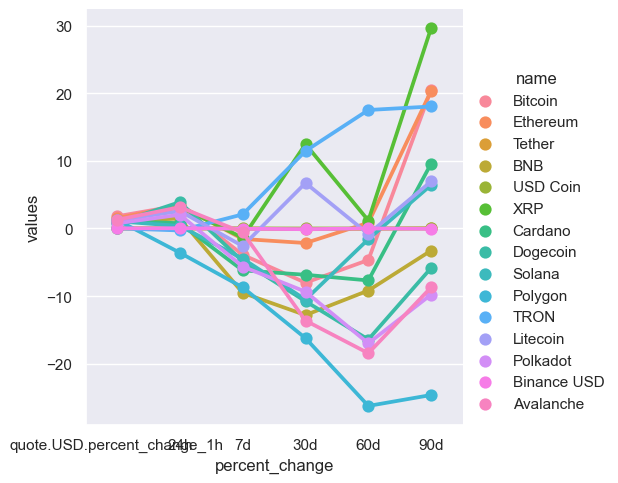

In [77]:

sns.catplot(x='percent_change', y='values', hue='name', data=df8, kind='point')


In [75]:
#redundant so delete
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df8

name               percent_change    values
0       Bitcoin  quote.USD.percent_change_1h   1.79439
1       Bitcoin                          24h   3.40609
2       Bitcoin                           7d  -3.90048
3       Bitcoin                          30d  -8.02770
4       Bitcoin                          60d  -4.66983
5       Bitcoin                          90d  20.51408
6      Ethereum  quote.USD.percent_change_1h   1.51708
7      Ethereum                          24h   3.35460
8      Ethereum                           7d  -1.55848
9      Ethereum                          30d  -2.15864
10     Ethereum                          60d   0.83603
11     Ethereum                          90d  20.35743
12       Tether  quote.USD.percent_change_1h  -0.00258
13       Tether                          24h  -0.00768
14       Tether                           7d  -0.01516
15       Tether                          30d  -0.11851
16       Tether                          60d  -0.04746
17       Tether                          90d   0.00778
18          BNB  quote.USD.percent_change_1h   1.06666
19          BNB                          24h   1.46201
20          BNB                           7d  -9.52933
21          BNB                          30d -12.81463
22          BNB                          60d  -9.18596
23          BNB                          90d  -3.26989
24     USD Coin  quote.USD.percent_change_1h  -0.00610
25     USD Coin                          24h   0.00883
26     USD Coin                           7d   0.00323
27     USD Coin                          30d  -0.00852
28     USD Coin                          60d   0.00093
29     USD Coin                          90d   0.00347
30          XRP  quote.USD.percent_change_1h   0.92662
31          XRP                          24h   3.21433
32          XRP                           7d  -1.38358
33          XRP                          30d  12.46860
34          XRP                          60d   1.16848
35          XRP                          90d  29.64936
36      Cardano  quote.USD.percent_change_1h   1.08664
37      Cardano                          24h   0.77564
38      Cardano                           7d  -6.20319
39      Cardano                          30d  -6.85463
40      Cardano                          60d  -7.69085
41      Cardano                          90d   9.59904
42     Dogecoin  quote.USD.percent_change_1h   0.80482
43     Dogecoin                          24h   3.89118
44     Dogecoin                           7d  -4.86793
45     Dogecoin                          30d -10.77690
46     Dogecoin                          60d -16.42471
47     Dogecoin                          90d  -5.83795
48       Solana  quote.USD.percent_change_1h   1.06064
49       Solana                          24h   0.36290
50       Solana                           7d  -4.46937
51       Solana                          30d -10.52670
52       Solana                          60d  -1.59483
53       Solana                          90d   6.42562
54      Polygon  quote.USD.percent_change_1h   1.26269
55      Polygon                          24h  -3.59153
56      Polygon                           7d  -8.71077
57      Polygon                          30d -16.22864
58      Polygon                          60d -26.24642
59      Polygon                          90d -24.63134
60         TRON  quote.USD.percent_change_1h   0.01674
61         TRON                          24h  -0.30185
62         TRON                           7d   2.07248
63         TRON                          30d  11.44629
64         TRON                          60d  17.50984
65         TRON                          90d  18.03078
66     Litecoin  quote.USD.percent_change_1h   1.19310
67     Litecoin                          24h   2.56705
68     Litecoin                           7d  -2.60726
69     Litecoin                          30d   6.71805
70     Litecoin                          60d  -0.83042
71     Litecoin                          90d   6.95

In [78]:
df9 = df[['name','quote.USD.price','timestamp']]
df9

name  quote.USD.price                   timestamp
0        Bitcoin      26440.03051  2023-06-06 17:17:28.389175
1       Ethereum       1865.18265  2023-06-06 17:17:28.389175
2         Tether          1.00020  2023-06-06 17:17:28.389175
3            BNB        282.02959  2023-06-06 17:17:28.389175
4       USD Coin          1.00003  2023-06-06 17:17:28.389175
5            XRP          0.51433  2023-06-06 17:17:28.389175
6        Cardano          0.35278  2023-06-06 17:17:28.389175
7       Dogecoin          0.06866  2023-06-06 17:17:28.389175
8         Solana         20.10808  2023-06-06 17:17:28.389175
9        Polygon          0.81552  2023-06-06 17:17:28.389175
10          TRON          0.07783  2023-06-06 17:17:28.389175
11      Litecoin         89.31754  2023-06-06 17:17:28.389175
12      Polkadot          5.12317  2023-06-06 17:17:28.389175
13   Binance USD          0.99980  2023-06-06 17:17:28.389175
14     Avalanche         14.28971  2023-06-06 17:17:28.389175
15       Bitcoin      26422.82656  2023-06-06 17:18:28.811443
16      Ethereum       1863.88862  2023-06-06 17:18:28.811443
17        Tether          1.00013  2023-06-06 17:18:28.811443
18           BNB        281.92542  2023-06-06 17:18:28.811443
19      USD Coin          0.99999  2023-06-06 17:18:28.811443
20           XRP          0.51432  2023-06-06 17:18:28.811443
21       Cardano          0.35277  2023-06-06 17:18:28.811443
22      Dogecoin          0.06865  2023-06-06 17:18:28.811443
23        Solana         20.10424  2023-06-06 17:18:28.811443
24       Polygon          0.81502  2023-06-06 17:18:28.811443
25          TRON          0.07782  2023-06-06 17:18:28.811443
26      Litecoin         89.30456  2023-06-06 17:18:28.811443
27      Polkadot          5.12278  2023-06-06 17:18:28.811443
28   Binance USD          0.99980  2023-06-06 17:18:28.811443
29     Avalanche         14.29009  2023-06-06 17:18:28.811443
30       Bitcoin      26708.98261  2023-06-06 17:46:04.132788
31      Ethereum       1878.83819  2023-06-06 17:46:04.132788
32        Tether          1.00010  2023-06-06 17:46:04.132788
33           BNB        282.93829  2023-06-06 17:46:04.132788
34      USD Coin          0.99998  2023-06-06 17:46:04.132788
35           XRP          0.51571  2023-06-06 17:46:04.132788
36       Cardano          0.35522  2023-06-06 17:46:04.132788
37      Dogecoin          0.06904  2023-06-06 17:46:04.132788
38        Solana         20.25403  2023-06-06 17:46:04.132788
39       Polygon          0.81940  2023-06-06 17:46:04.132788
40          TRON          0.07788  2023-06-06 17:46:04.132788
41      Litecoin         89.82045  2023-06-06 17:46:04.132788
42      Polkadot          5.14614  2023-06-06 17:46:04.132788
43   Binance USD          0.99973  2023-06-06 17:46:04.132788
44     Avalanche         14.41582  2023-06-06 17:46:04.132788
45       Bitcoin      26697.77952  2023-06-06 17:47:04.555740
46      Ethereum       1877.81509  2023-06-06 17:47:04.555740
47        Tether          0.99998  2023-06-06 17:47:04.555740
48           BNB        282.98342  2023-06-06 17:47:04.555740
49      USD Coin          0.99989  2023-06-06 17:47:04.555740
50           XRP          0.51579  2023-06-06 17:47:04.555740
51       Cardano          0.35524  2023-06-06 17:47:04.555740
52      Dogecoin          0.06905  2023-06-06 17:47:04.555740
53        Solana         20.25593  2023-06-06 17:47:04.555740
54       Polygon          0.81952  2023-06-06 17:47:04.555740
55          TRON          0.07789  2023-06-06 17:47:04.555740
56      Litecoin         89.83548  2023-06-06 17:47:04.555740
57      Polkadot          5.14599  2023-06-06 17:47:04.555740
58   Binance USD          0.99978  2023-06-06 17:47:04.555740
59     Avalanche         14.41698  2023-06-06 17:47:04.555740
60       Bitcoin      26718.61698  2023-06-06 17:48:04.901640
61      Ethereum       1879.31725  2023-06-06 17:48:04.901640
62        Tether          1.00000  2023-06-06 17:48:04.901640
63           BNB        282.95010  2023-06-0

<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

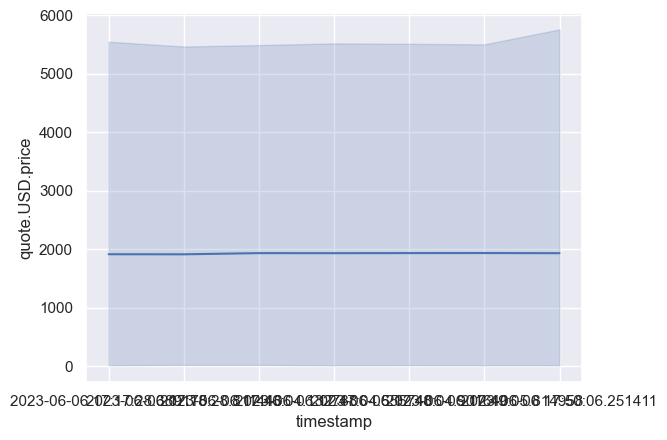

In [79]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df9)

In [80]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

name  quote.USD.price                   timestamp
0   Bitcoin      26440.03051  2023-06-06 17:17:28.389175
15  Bitcoin      26422.82656  2023-06-06 17:18:28.811443
30  Bitcoin      26708.98261  2023-06-06 17:46:04.132788
45  Bitcoin      26697.77952  2023-06-06 17:47:04.555740
60  Bitcoin      26718.61698  2023-06-06 17:48:04.901640
75  Bitcoin      26730.15131  2023-06-06 17:49:05.814958
90  Bitcoin      26696.43667  2023-06-06 17:50:06.251411

<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

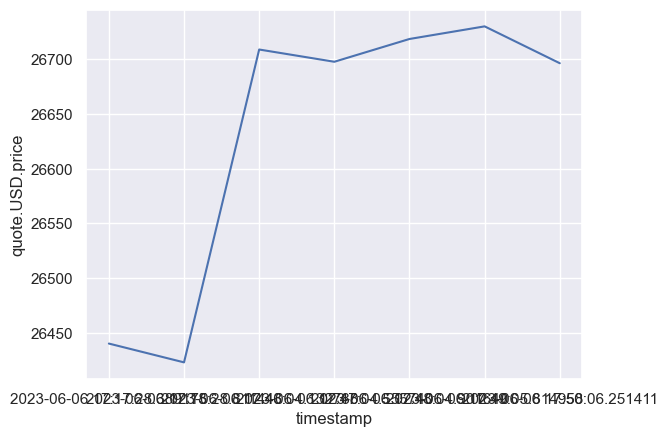

In [81]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)